In [332]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df_list = [] # used for plotting
filename_list = []
for filename in os.listdir("data/cleaned_data"):
    df = pd.read_csv(f"data/cleaned_data/{filename}")
    filename_list.append(filename)
    df_list.append(df)
print(filename_list)

['WS23_L3_T1_P_16.csv', 'WS23_L2_T2_P_3.csv', 'WS23_L2_T1_P_4.csv', 'WS23_L1_T1_P_17.csv', 'WS23_L2_T2_P_2.csv', 'WS23_L1_T1_P_8.csv', 'WS23_L1_T1_P_21.csv', 'WS23_L1_T1_P_16.csv', 'WS23_L3_T1_P_11.csv', 'WS23_L3_T1_P_25.csv', 'WS23_L1_T1_P_5.csv', 'WS23_L3_T1_P_9.csv', 'WS23_L2_T1_P_14.csv', 'WS23_L2_T1_P_12.csv', 'WS23_L2_T2_P_4.csv', 'WS23_L2_T1_P_9.csv', 'WS23_L2_T1_P_13.csv', 'WS23_L1_T1_P_23.csv', 'WS23_L1_T1_P_14.csv', 'WS23_L2_T1_P_6.csv', 'WS23_L2_T1_P_16.csv', 'WS23_L2_T2_P_0.csv', 'WS23_L2_T1_P_2.csv', 'WS23_L1_T1_P_7.csv', 'WS23_L1_T1_P_11.csv', 'WS23_L3_T1_P_17.csv', 'WS23_L3_T1_P_4.csv', 'WS23_L2_T1_P_5.csv', 'WS23_L1_T1_P_12.csv', 'WS23_L3_T1_P_29.csv', 'WS23_L2_T1_P_8.csv', 'WS23_L1_T1_P_6.csv', 'WS23_L3_T1_P_33.csv', 'WS23_L2_T1_P_10.csv', 'WS23_L3_T1_P_32.csv', 'WS23_L3_T1_P_6.csv', 'WS23_L1_T1_P_4.csv', 'WS23_L3_T1_P_15.csv', 'WS23_L1_T1_P_15.csv', 'WS23_L3_T1_P_1.csv', 'WS23_L1_T1_P_9.csv', 'WS23_L3_T1_P_0.csv', 'WS23_L1_T1_P_3.csv', 'WS23_L3_T1_P_13.csv', 'WS23_L2_

In [333]:
data_df = pd.read_csv("data/features.csv")
features_df = data_df.drop(['filenames', 'y_labels'], axis=1)

# Visualization Functions

In [334]:
from sklearn.decomposition import PCA

label_color_map = {0: 'red', 1: 'gold', 2: 'blue', 3: 'green', 4: 'purple', 5: 'pink',
        6: 'brown', 7: 'orange', 8: 'cyan', 9: 'magenta', 10: 'yellow',
        11: 'lime', 12: 'teal', 13: 'navy', 14: 'maroon', 15: 'olive',
        16: 'coral', 17: 'grey', 18: 'salmon', 19: 'turquoise'}

size_fig = (4,3)

def get_curve_idx_from_cluster_color(color, y_labels):
    print(f"Indexes of curves assigned to {color} cluster: ")
    for i, label in enumerate(y_labels):
        if label_color_map[label] == color:
            print(filename_list[i])

def visualize_clusters(representation_list, y_labels, graph_title="", generate_plot_idx=[-1], kmeans_centroids=False, use_pca=False, two_d=False, 
                       plot_all_curves_oneplot=False, cluster_i_overlay=False, cluster_i_plot_labels=[]):
    if generate_plot_idx[0] != -1:
        combined_columns = pd.concat(df_list)
        for idx in generate_plot_idx:
            plt.figure(figsize=size_fig)
            plt.xlabel('Depth (m)')
            plt.ylabel('Resistance (N)')
            plt.title('Depth vs Resistance Curve')
            plt.xlim([0, combined_columns["depth"].max()])
            plt.ylim([0, combined_columns["resistance"].max()])
            plt.plot(df_list[idx]["depth"], df_list[idx]["resistance"], c='black')
    
    if use_pca:
        # calculate PCA
        pca = PCA(n_components=2) # reduce data down to 2 dims
        # print(f"representation_list: {representation_list.values}")
        pca.fit(representation_list.values)
        X_pca = pca.transform(representation_list.values)
        # plot
        plt.figure(figsize=size_fig)
        plt.title(f"{graph_title} Clustering Visualized with pca")
        colors = [label_color_map[label] for label in y_labels]
        plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0)
        for i in range(X_pca.shape[0]): # loops over every point
            plt.text(X_pca[i,0], X_pca[i,1], str(i), c=label_color_map[y_labels[i]], fontsize=8)

        # special cases per algorithm used
        if graph_title.lower() == "kmeans" and kmeans_centroids.any():
            centroids_pca = pca.transform(kmeans_centroids)
            plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c="Red", marker="^", s=180)
        if graph_title.lower() == "dbscan":
            plt.scatter([], [], c=label_color_map[max(y_labels)], label='Outliers')
            plt.legend()

        # plot
        plt.savefig(f"figures/{graph_title.lower()}/PCA", bbox_inches='tight')
        plt.show()
        plt.close() # clear figure 

    if plot_all_curves_oneplot:
        a = 0.3
        combined_columns = pd.concat(df_list, axis=0, ignore_index=True)
        plt.figure(figsize=size_fig)
        for i, y in enumerate(y_labels):
            df = df_list[i]
            color = label_color_map.get(y, 'black')  # default to black if label not in map
            plt.plot(df["depth"], df["resistance"], color=color, alpha=a)
        plt.xlabel('Depth (m)')
        plt.ylabel('Resistance (N)')
        plt.title('Depth vs Resistance Curves')
        plt.xlim([0, combined_columns["depth"].max()])
        plt.ylim([0, combined_columns["resistance"].max()])
        plt.savefig(f"figures/{graph_title.lower()}/cluster_curves", bbox_inches='tight')
        plt.show()
        plt.close() # clear figure 

    if cluster_i_overlay:
        combined_columns = pd.concat(df_list, axis=0, ignore_index=True)
        a = 1
        # color_list = ["Red", "Grey", "Blue", "Green", "Purple", "Pink", "Brown"]
        for i in range(max(y_labels)+1): # for each cluster, +1 bc clusters are 0 indexed too
            plt.figure(figsize=size_fig)
            plt.xlabel('Depth (m)')
            plt.ylabel('Resistance (N)')
            plt.xlim([0, combined_columns["depth"].max()])
            plt.ylim([0, combined_columns["resistance"].max()])

            if len(cluster_i_plot_labels): plt.title(f'{cluster_i_plot_labels[i].title()} Cluster: Depth vs Resistance Curves')
            else: plt.title(f'{label_color_map.get(i, 'black').capitalize()} Cluster: Depth vs Resistance Curves')
            
            for j in range(len(y_labels)): # for each curve
                if i == y_labels[j]: # if the curve is in cluster
                    color = label_color_map.get(i, 'black')
                    plt.plot(df_list[j]["depth"], df_list[j]["resistance"], color=color, alpha=a)
            plt.savefig(f"figures/{graph_title.lower()}/{color}_cluster", bbox_inches='tight')
            plt.show()
            plt.close() # clear figure 

    if two_d and len(representation_list.columns) == 2:
        x = representation_list.columns[0]
        y = representation_list.columns[1]
        plt.scatter(representation_list[x], representation_list[y], c=y_labels, cmap="coolwarm")
        plt.title(f"{graph_title} Clustering: {x} and {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
        plt.close() # clear figure 

# PCA Analysis

In [335]:

def pca_analysis(representation_list):
    pca = PCA(n_components=len(representation_list.columns))
    pca.fit(representation_list.values)

    # plot scree plot
    plt.figure(figsize=size_fig)
    plt.title("Scree Plot")
    plt.xlabel("PC Number")
    plt.ylabel("Eigenvalue")
    plt.xticks(range(1, pca.n_components_+1))
    plt.plot(range(1, pca.n_components_+1), pca.explained_variance_)
    plt.show()

    # principal component table
    principle_components_table = pd.DataFrame({
        "PC": range(1,pca.n_components_+1),
        "Eigenvalue": pca.explained_variance_,
        "Proportion": pca.explained_variance_ratio_
    })
    principle_components_table.set_index('PC', inplace=True)
    principle_components_table["Cumulative"] = principle_components_table["Proportion"].cumsum()
    print(principle_components_table)

    loadings = pca.components_.T
    pc_labels = [f'PC{i+1}' for i in range(loadings.shape[1])]
    loadings_df = pd.DataFrame(loadings, index=representation_list.columns, columns=pc_labels)
    print('\n')
    print(loadings_df)

# Clustering Just the Labled Data Points

overall_slope                0.399236
max_depth                   -0.430733
max_resistance                0.72951
num_peaks                    0.257508
force_drop                  -0.558874
filenames         WS23_L3_T1_P_16.csv
y_labels                crusty ripple
Name: 0, dtype: object
Index(['crusty ripple', 'biotic crust', 'strata',
       'abiotic crust on top of strata', 'abiotic crust',
       'biotic crust with surface nodules', 'crust ripple',
       'strong biotic crust', 'strata with loose sand on top',
       'abiotic crust with surface nodule'],
      dtype='object')


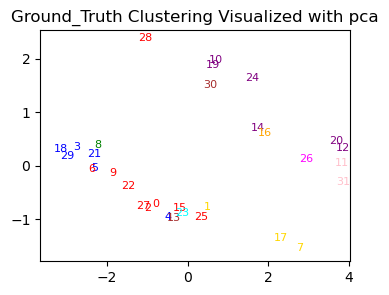

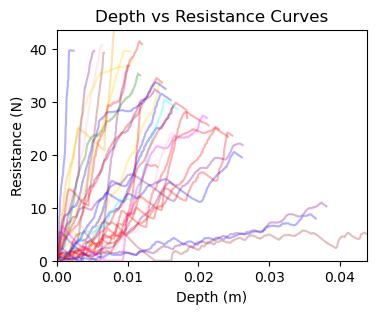

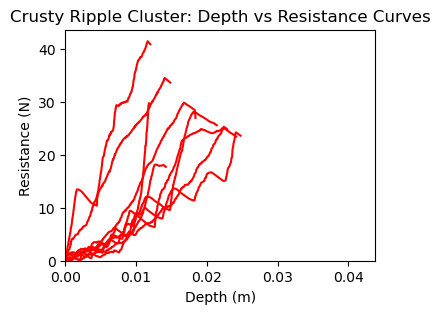

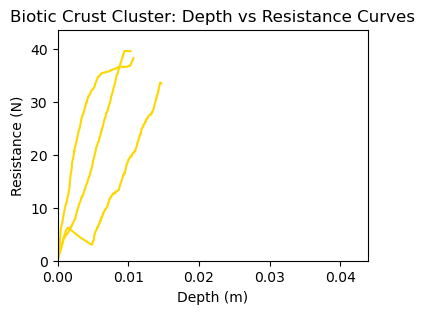

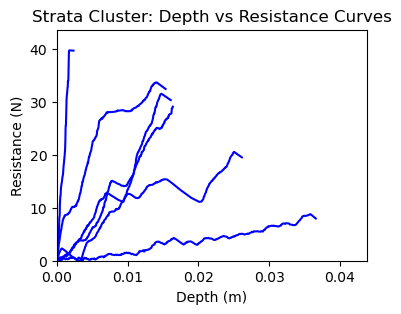

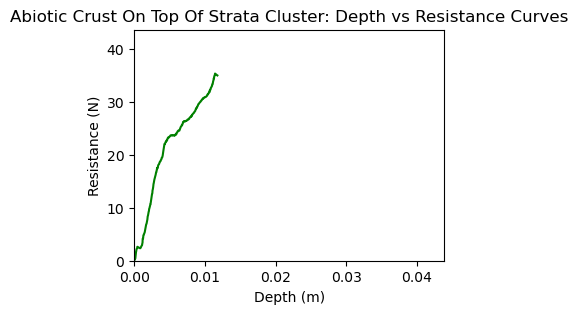

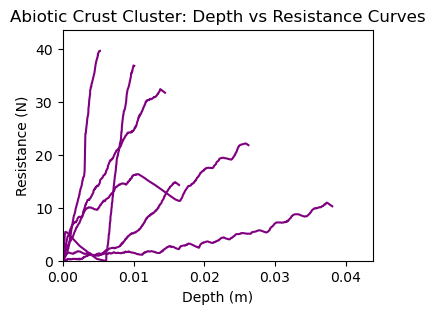

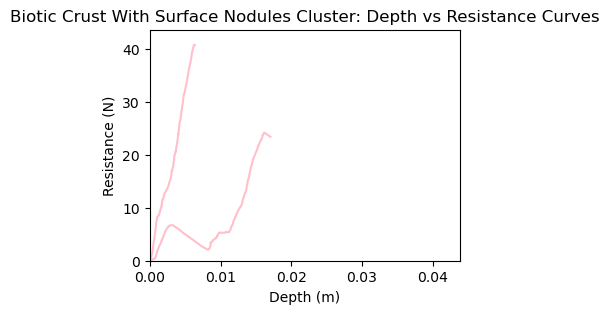

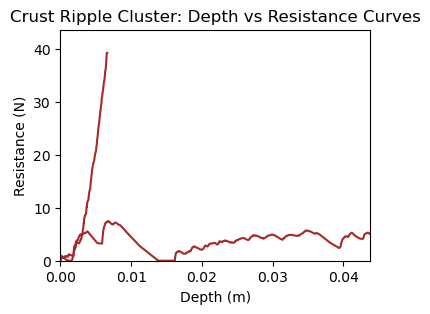

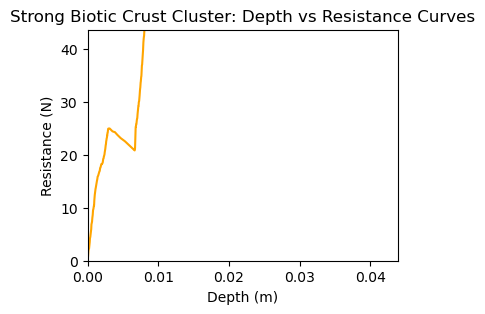

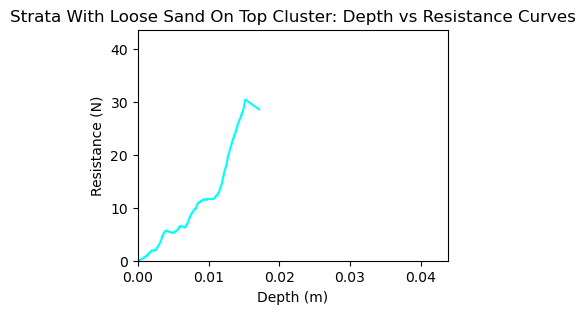

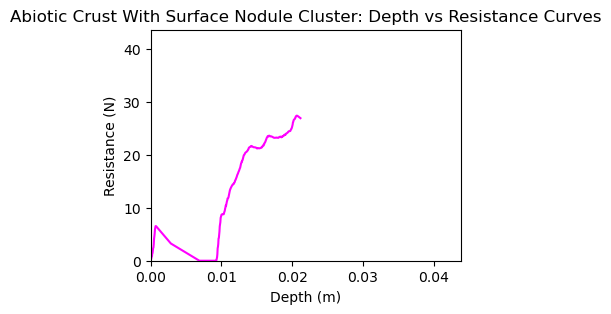

In [ ]:
labled_data_df = data_df[data_df['y_labels'].notna()].reset_index(drop=True)
labled_data_df = labled_data_df.reset_index(drop=True)
print(f"{labled_data_df.iloc[0]}")
# walrus
labled_data_df['encoded'], uniques = pd.factorize(labled_data_df['y_labels'])
print(uniques)
visualize_clusters(labled_data_df.drop(['filenames', 'y_labels', 'encoded'], axis=1), y_labels=labled_data_df['encoded'].tolist(), graph_title="Ground_Truth", 
                   use_pca=True, plot_all_curves_oneplot=True, cluster_i_overlay=True, cluster_i_plot_labels=uniques)

# K-Means Clustering Implementation w/ k-means++ initialization for centroids

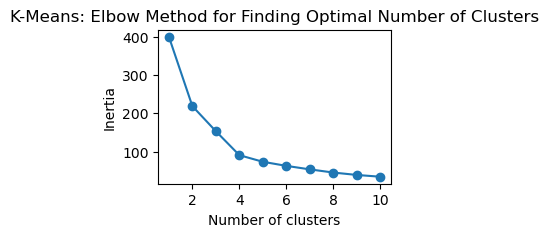

In [337]:
from sklearn.cluster import KMeans
import numpy as np

inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=100).fit(features_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(3,2))
plt.plot(range(1,11), inertias, marker='o')
plt.title("K-Means: Elbow Method for Finding Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid=True
plt.show()

# K-Means Clustering
- assumes
    - spherical clusters (isotropic)
    - similar size clusters (equal variance)
    - features are on same scale
    - clusters are linearly separable
    - number of clusters (k) is known

kmeans labels:
[2 2 4 1 3 2 2 1 2 4 4 1 2 1 3 4 1 1 2 0 1 2 2 2 1 1 3 4 2 0 5 3 2 2 3 5 2
 2 4 3 2 0 2 2 2 1 3 0 1 4 3 3 2 5 1 3 2 0 4 5 2 1 2 3 0 2 5 2 0 4 0 3 1 2
 3 1 1 4 5 3]


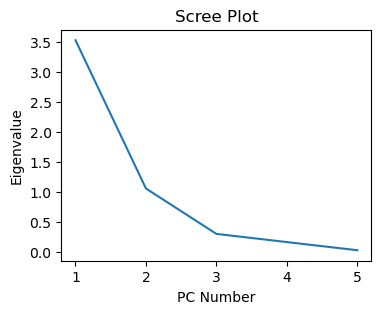

    Eigenvalue  Proportion  Cumulative
PC                                    
1     3.522867    0.695766    0.695766
2     1.053969    0.208159    0.903925
3     0.298254    0.058905    0.962830
4     0.161831    0.031962    0.994792
5     0.026369    0.005208    1.000000


                     PC1       PC2       PC3       PC4       PC5
overall_slope   0.528021  0.006958  0.193074 -0.096394  0.821326
max_depth      -0.505451  0.094189 -0.330917  0.632023  0.476118
max_resistance  0.502994  0.051832  0.272686  0.762150 -0.298462
num_peaks      -0.423095 -0.430948  0.788338  0.064836  0.097944
force_drop     -0.183575  0.895922  0.396714 -0.078603  0.007946


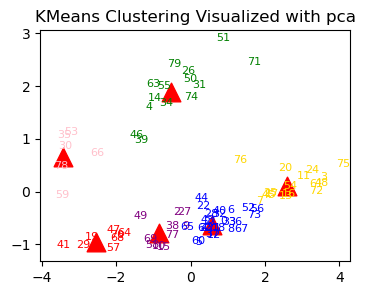

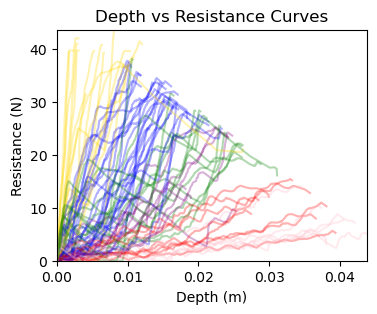

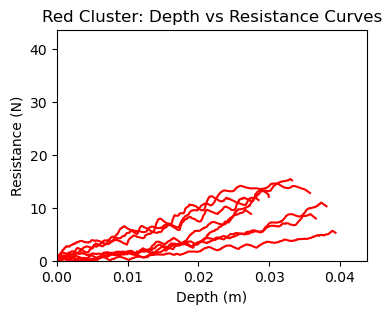

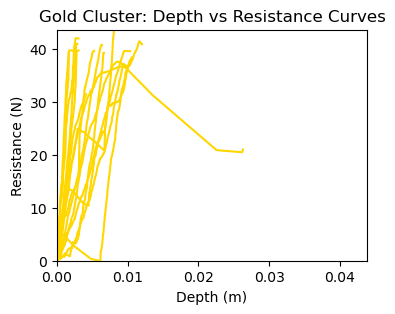

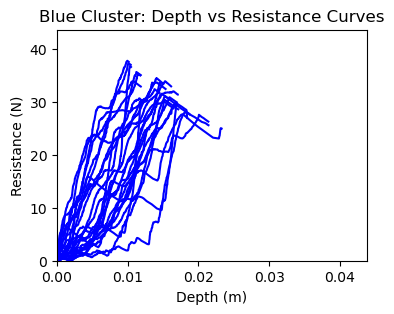

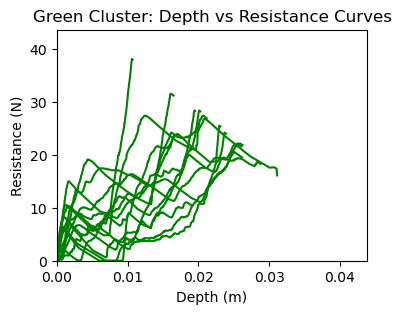

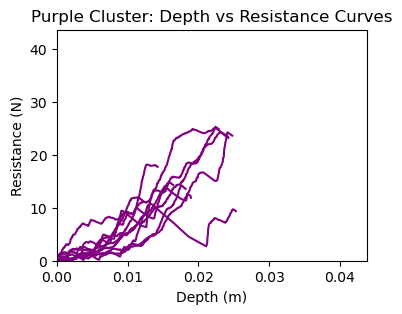

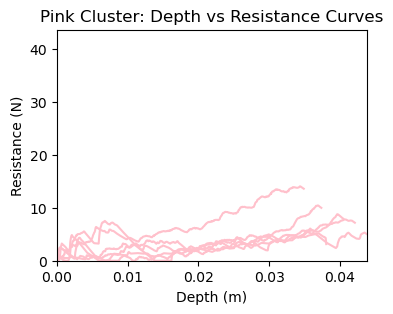

In [338]:
kmeans_elbow = 6
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(features_df)
print(f"kmeans labels:\n{kmeans.labels_}")
# print(f"kmeans cluster centers: {kmeans.cluster_centers_}")
pca_analysis(features_df)
visualize_clusters(features_df, kmeans.labels_, graph_title="KMeans", kmeans_centroids=kmeans.cluster_centers_, use_pca=True, two_d=False, plot_all_curves_oneplot=True, cluster_i_overlay=True)

# Hierarchical Clustering

[ 8  2  9  4  3  2  9  7  8  6  6  4  2  7  3  2  7  7  2  1  4  9  9  2
  4  7  0  9  9  1  5  0  9  8  3  5  8  2  2  3  9  1  2  9  9  7  3  1
  4  1  0  0  8  5  4  3  8  1  6  5  2  4  2  3  1  2  5  8  1  6  1  0
  4  8  0  4 10  6  5  0]


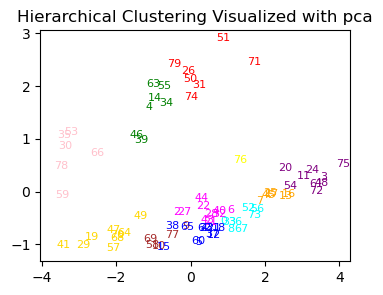

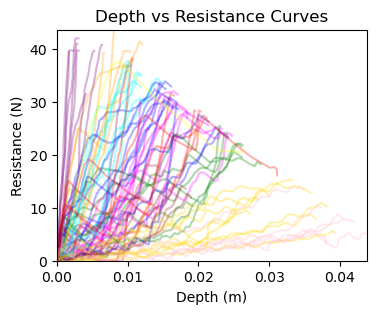

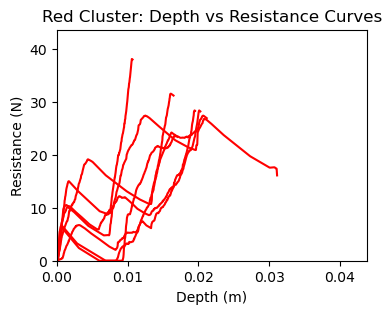

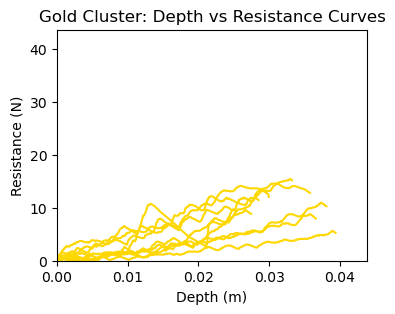

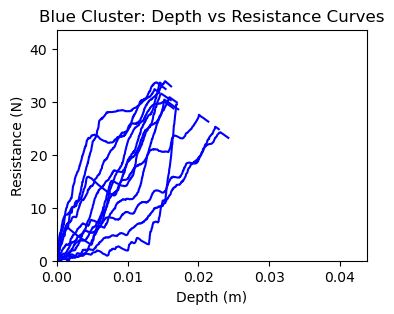

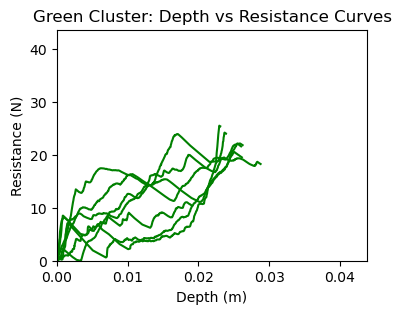

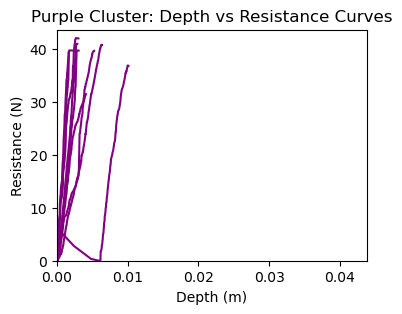

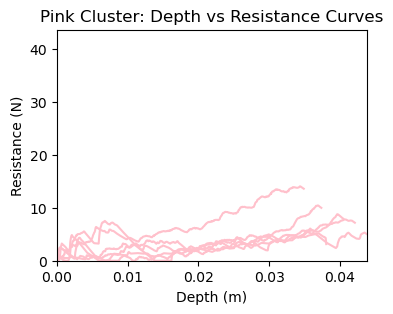

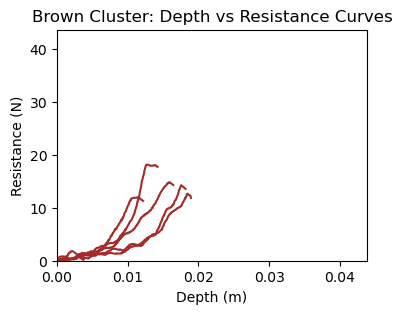

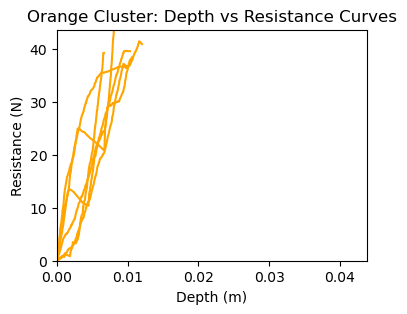

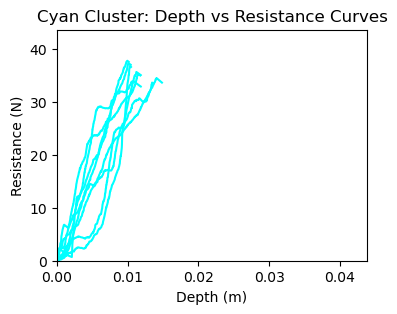

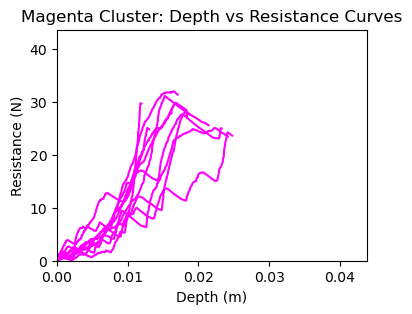

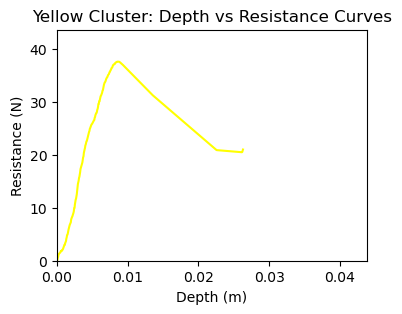

In [339]:
from sklearn.cluster import AgglomerativeClustering

# if distance_threshold != None then n_clusters = None
hierarchical = AgglomerativeClustering(distance_threshold=None, n_clusters=11)
hierarchical.fit(features_df)
linkage = "Ward"
print(hierarchical.labels_)
# get_curve_idx_from_cluster_color("green", hierarchical.labels_)
visualize_clusters(features_df, hierarchical.labels_, graph_title="Hierarchical", use_pca=True, plot_all_curves_oneplot=True, cluster_i_overlay=True)

# Manual Clustering

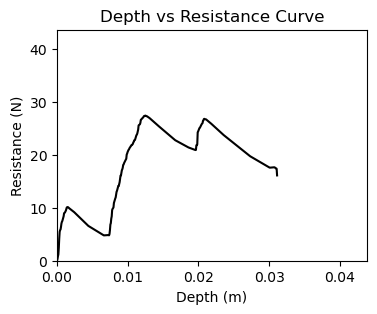

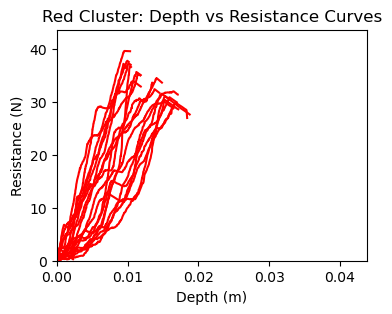

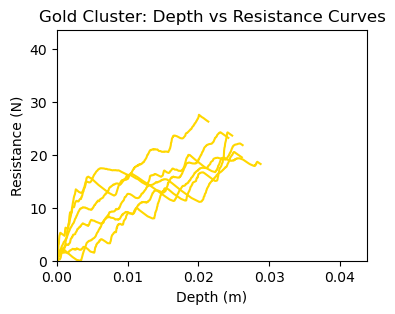

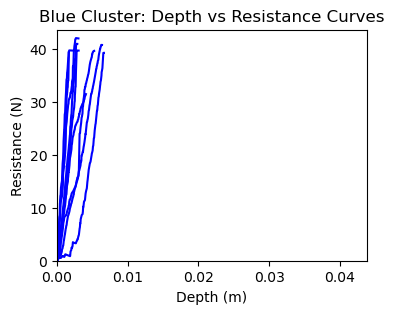

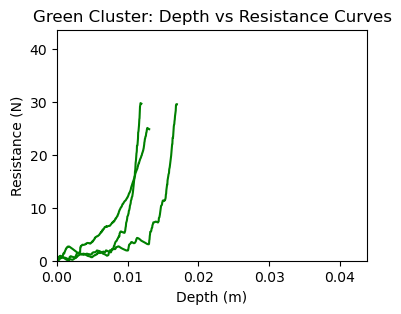

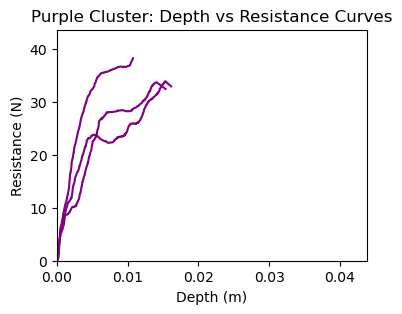

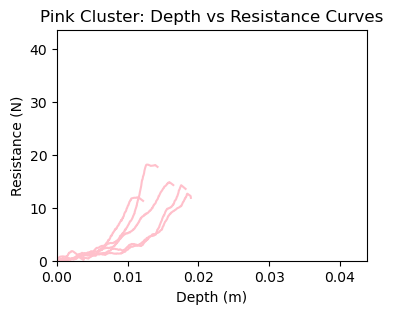

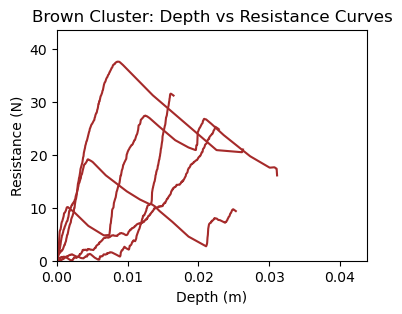

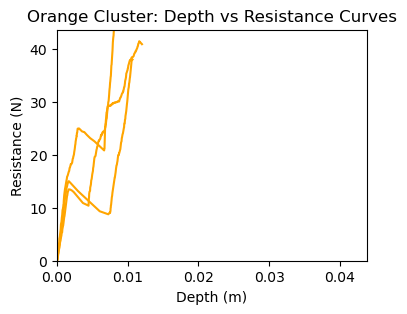

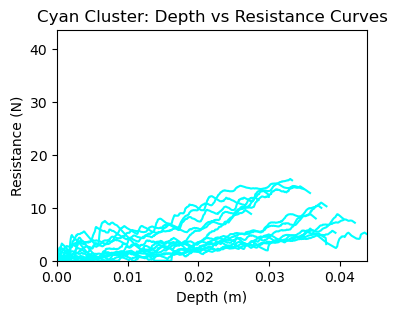

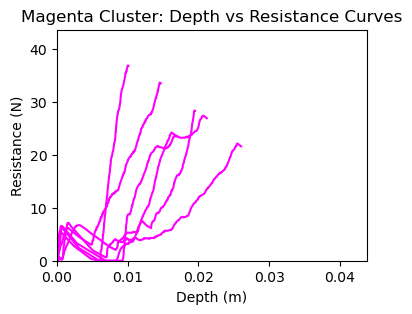

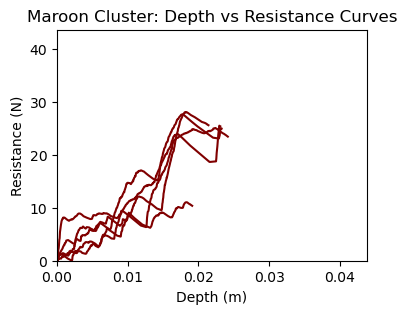

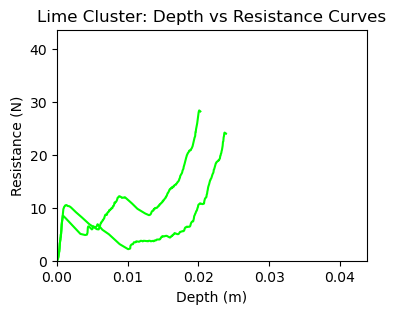

In [340]:
from collections import defaultdict

label_color_map = {0: 'red', 1: 'gold', 2: 'blue', 3: 'green', 4: 'purple', 5: 'pink',
        6: 'brown', 7: 'orange', 8: 'cyan', 9: 'magenta', 10: 'maroon',
        11: 'lime', 12: 'teal', 13: 'navy', 14: 'yellow', 15: 'olive',
        16: 'coral', 17: 'grey', 18: 'salmon', 19: 'turquoise', 20: 'black'}
y_labels = [0,9,1,2,1,0,3,4,0,5,
            5,2,0,2,1,6,7,0,4,8,
            9,0,10,0,2,7,9,10,0,
            8,8,9,0,0,10,8,0,4,1,
            10,3,8,0,0,10,0,1,8,2,
            6,9,6,0,8,2,11,0,8,5,
            8,0,2,3,9,8,1,8,0,8,
            5,8,7,2,0,11,2,6,5,8,
            6]

color_indices = [i for i, val in enumerate(y_labels) if val == 6]

# visualize_clusters(features_df, [20], generate_plot_idx=color_indices)

# get_curve_idx_from_cluster_color("pink", y_labels)
# print(f"current plot filename: {data_df.iloc[len(y_labels)-1]['filenames']}")
visualize_clusters(features_df.iloc[:len(y_labels)], y_labels, generate_plot_idx=[len(y_labels)-1], cluster_i_overlay=True)

# DBSCAN

[ 0  0  0  1  2  0  0  0  0 -1 -1 -1  0  0  2 -1  0  0  0 -1 -1  0  0  0
 -1  0 -1  0  0 -1 -1 -1  0  0  2 -1  0  0  0 -1 -1 -1  0  0  0  0 -1  3
  1 -1 -1 -1  0 -1 -1  2  0  3 -1 -1  0  1  0  2  3  0 -1  0  3 -1  3 -1
  1  0 -1  1 -1 -1 -1 -1]


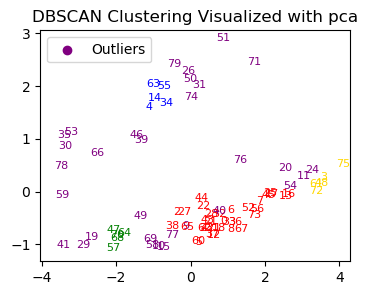

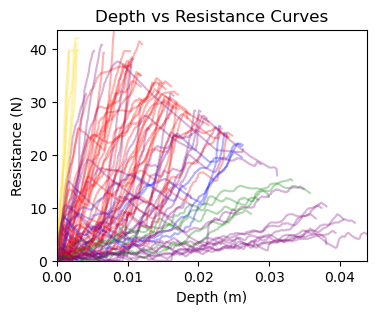

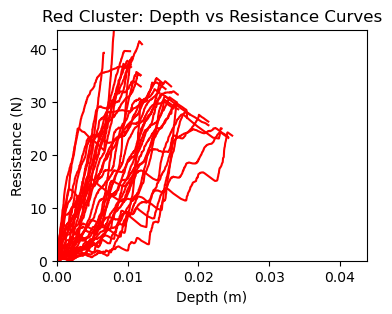

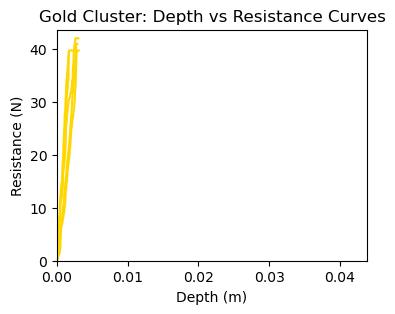

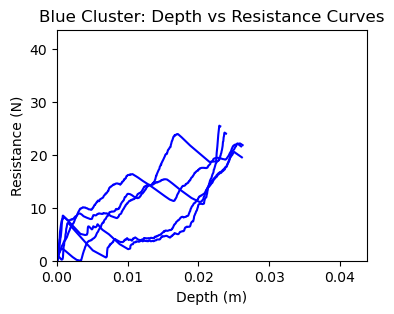

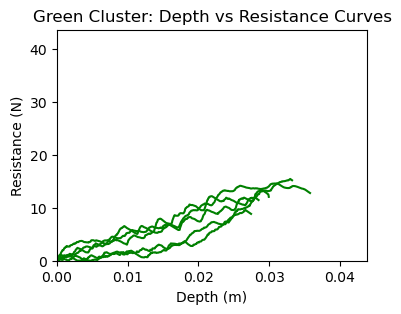

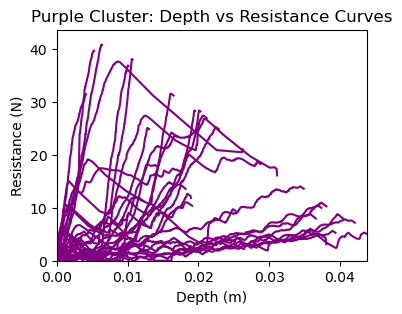

In [341]:
from sklearn.cluster import DBSCAN

# eps=0.7, min_samples=3 works very well
dbscan = DBSCAN(eps=0.7, min_samples=5).fit(features_df)
print(dbscan.labels_)
cleaned_db_labels = [label if label != -1 else max(dbscan.labels_)+1 for label in dbscan.labels_]
# get_curve_idx_from_cluster_color("yellow", cleaned_db_labels)
visualize_clusters(features_df, y_labels = cleaned_db_labels, graph_title="DBSCAN", use_pca=True, plot_all_curves_oneplot=True, cluster_i_overlay=True)